**Submission Klasifikasi Gambar**

---

Kelas Belajar Machine Learning untuk Pemula

Nama : Muhammad Fariz

Email : mfarix730@gmail.com

Mahasiswa Sistem Informasi Universitas Andalas

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import shutil
import random
from google.colab import files
from IPython.display import display, Image

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

In [58]:
dataset = 'rockpaperscissors'
basis = '/content/rockpaperscissors/rps-cv-images'

In [53]:
!rm -r train
!rm -r validation

rm: cannot remove 'train': No such file or directory
rm: cannot remove 'validation': No such file or directory


In [70]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    validation_split=0.4
)

In [71]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [72]:
train_generator = train_datagen.flow_from_directory(
    basis,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

Found 1314 images belonging to 3 classes.


In [73]:
validation_generator = train_datagen.flow_from_directory(
    basis,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 874 images belonging to 3 classes.


In [74]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(3, activation="softmax")
])

In [ ]:
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model_checkpoint = ModelCheckpoint("hasil_model.h5", save_best_only=True, save_weights_only=False, monitor="val_accuracy", mode="max", verbose=1)

history = model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator,
    callbacks=[model_checkpoint]
)

Epoch 1/12
22/42 [==============>...............] - ETA: 39s - loss: 0.1036 - accuracy: 0.9616

Saving gtVEm7JEdr0wE1ip.png to gtVEm7JEdr0wE1ip (2).png
Nama file : "gtVEm7JEdr0wE1ip (2).png". Ukuran file : 83886 bytes
1/1 [==============================] - 0s 25ms/step


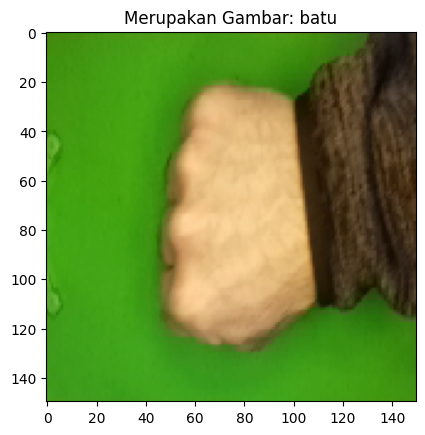

In [ ]:
def gambar():
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('Nama file : "{name}". Ukuran file : {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
    return list(uploaded.keys())[0]

jalur_gambar = gambar()

img = image.load_img(jalur_gambar, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediksi = model.predict(img_array)
index = np.argmax(prediksi)
label = {0: "kertas", 1: "batu", 2: "gunting"}
class_prediksi = label[index]

plt.imshow(img)
plt.title(f'Merupakan Gambar: {class_prediksi}')
plt.show()